# HW3

*deadline*: 20/02/2023 11:59 PM, submit to *almarkv@yandex.ru* with __[ML_in_SWE] Задание 3 - ФИО__ topic

[based on MIPT NLP [course](https://github.com/yandexdataschool/nlp_course)]

_____

Using [transformers](https://github.com/huggingface/transformers) library solve the [sentiment classification task](https://ai.stanford.edu/~amaas/data/sentiment/) (scroll down, dataloading is written for you).

In this homework you should explore sentiment task; make a simple classifier with BERT embeddings to predict if the hypothesis is entailed from the premise text or not; finetune BERT-based model on sentiment task; make LM model and again finetune on the classification task; compare the results of classifiers and describe your results.


### Rules

* Homework can be done in a group of up to 3 people. 
If you are doing a task in a group, please indicate in your submission all your names.
* Plagiarism and any unfair quotation leads to zeroing of the score.



__How to__ sections give you possible ways how to complete these tasks. You may solve them in your own way, just make sure it works

#### Part 0. [2 point] Get embeddings

Take any BERT model and get BERT embeddings from the train dataset (or train + dev).

How to:

1) Load model and tokenizer with Auto-classes
2) Create a dataset, tokenize it (as in seminar notebook)
3) Iterate over it (better in colab to save your time), pass tokenized example through model, take last_hidden_states and use its mean vector or a first (corresponding to [CLS] token) as sentence embedding

#### Part 1. [2 point] Explore your data

* Make a 2D reduction and draw plot for train labels.
* Analyze your results. 

How to:

1) convert embeddings to numpy matrix
2) apply PCA(n_components=2) from sklearn, use plt.scatter
3) ???
4) profit

#### Part 2. [2 points] Make first classifier

* Use pretrained embeddings as features to classifier. You can use for example SVM or LinearRegression.
* Evaluate yourself by test dataset labels, do not use for train!


How to:

1) use any classifier from sklearn library, train in on np.array of embeddings vectors from step 0.
2) compute accuracy

#### Part 3. [4 points] Finetune on Classification task

* Finetune on a classification task with BERT-based model you chose in the 0 part
* Evaluate yourself by test dataset labels, do not use for train!


How to:

1) Switch to BertModelForSequenceClassification, pass num_classes
2) Add labels (if you removed them) to your datasets.Dataset class 
3) Train model using huggingface Trainer class. Make sure that `out = model(**batch)` results in `out.loss is not None`. You can google a lot of examples how to do it *finetune huggingface bert for sequence classification*

#### Part 4. [4 points] Finetune LM
* Finetune language model with BERT-based model you chose in the 0 part.


How to:

1) Switch to BertModelForMaskedLM
2) Switch DataCollator to DataCollatorForLM(mlm=True)
3) Finetune it using huggingface trainer on your dataset. You can google a lot of examples like *finetune MLM bert huggingface*

#### Part 5. [4 points] Finetune on classification task your new LM model

* Finetune on a classification task with BERT-based model you've done in part 4
* Evaluate yourself by test dataset labels, do not use for train!

How to:

1) Initilize BertModelForSequenceClassification from model trained in part 4
2) repeat step 3

#### Part 6. [2 point] Results

* Describe your results and experiments. Compare results from tree classifiers. 

**TOTALLY: you can get maximum 20 points**. Everything that is larger than 10 will be counted as bonus

#### Load Data

In [6]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.8/462.8 KB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 17.9 MB/s eta 0:00:00
  Using cached huggingface_hub-0.12.1-py3-none-any.whl (190 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 10.8 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [7]:
import datasets

In [8]:
ds = datasets.load_dataset("imdb")

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb downloaded and prepared to /root/.cache/huggingface/datasets/imdb/plain_text/1.0.0/d613c88cf8fa3bab83b4ded3713f1f74830d1100e171db75bbddb80b3345c9c0. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [9]:
train, test = ds["train"], ds["test"]

In [10]:
print(type(train['text']))
print(type(train['label']))

<class 'list'>
<class 'list'>


In [11]:
train[0]['text']

'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far between, ev

### do not use ds["test"] for train!

ok, honey 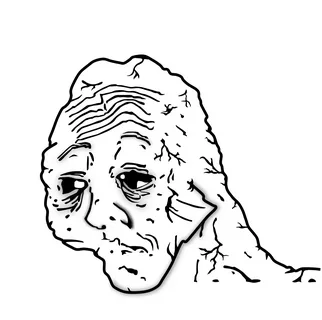

##part 0

Take any BERT model and get BERT embeddings from the train dataset (or train + dev).

How to:

1) Load model and tokenizer with Auto-classes

2) Create a dataset, tokenize it (as in seminar notebook)

3) Iterate over it (better in colab to save your time), pass tokenized example through model, take last_hidden_states and use its mean vector or a first (corresponding to [CLS] token) as sentence embedding

In [ ]:
!pip install transformers

In [15]:
import torch
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

In [ ]:
from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
model = BertModel.from_pretrained('bert-base-cased',
                                  output_hidden_states = True, # Whether the model returns all hidden-states.
                                  ).to(device)

https://stackoverflow.com/questions/69517460/bert-get-sentence-embedding

In [ ]:
model.eval()

###осознание:

In [ ]:
batch_sentences = ["And another sentence",
                    "And another sentence",
                    "And the very very last one"]
encoded = tokenizer.batch_encode_plus(batch_sentences,max_length=50, padding='max_length', truncation=True)
encoded_inputs = {key:torch.LongTensor(value).to(device) for key, value in encoded.items()}
print(encoded_inputs)

In [89]:
# Predict hidden states features for each layer
with torch.no_grad():
        outputs = model(**encoded_inputs)

In [90]:
lhs = outputs['last_hidden_state']
lhs.shape

torch.Size([3, 50, 768])

In [91]:
encoded_inputs['attention_mask'].shape

torch.Size([3, 50])

In [92]:
attention = encoded_inputs['attention_mask'].reshape((lhs.size()[0], lhs.size()[1], -1)).expand(-1, -1, 768)
attention.shape

torch.Size([3, 50, 768])

In [93]:
embeddings = torch.mul(lhs, attention)
embeddings.shape

torch.Size([3, 50, 768])

In [94]:
denominator = torch.count_nonzero(embeddings, dim=1)
denominator.shape

torch.Size([3, 768])

In [95]:
mean_embeddings = torch.div(torch.sum(embeddings, dim=1), denominator)
mean_embeddings.shape

torch.Size([3, 768])

In [96]:
assert torch.allclose(mean_embeddings[0], mean_embeddings[1])

In [97]:
len(max(train, key = lambda x: len(x['text']))['text'])

13704

In [98]:
len(min(train, key = lambda x: len(x['text']))['text'])

52

In [99]:
sum([len(x['text']) for x in train])/len(train)

1325.06964

In [100]:
import matplotlib.pyplot as plt
import numpy as np

lengths = sorted([len(x['text']) for x in train])

# Get unique values in array and sort them in ascending order
unique_values = np.unique(lengths)
unique_values.sort()

# Count frequency of each value in array
counts = [np.count_nonzero(lengths == val) for val in unique_values]

bin_width = 1
bins = np.arange(0, np.max(lengths) + bin_width, bin_width)

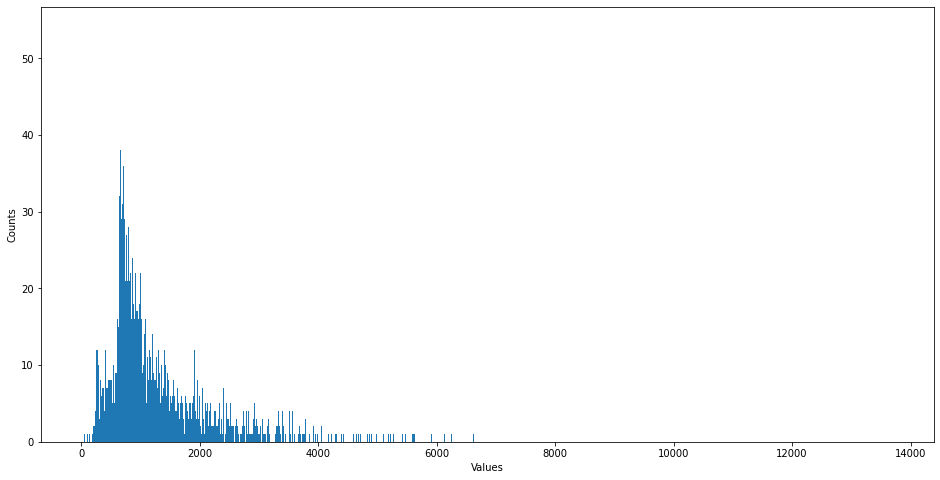

In [101]:
plt.figure(figsize=(16, 8))

# Plot histogram
plt.hist(lengths, bins=bins)
plt.xlabel('Values')
plt.ylabel('Counts')
plt.show()

In [102]:
labels = sorted([x['label'] for x in train])

# Get unique values in array and sort them in ascending order
unique_values = np.unique(labels)
unique_values.sort()

# Count frequency of each value in array
counts = [np.count_nonzero(labels == val) for val in unique_values]

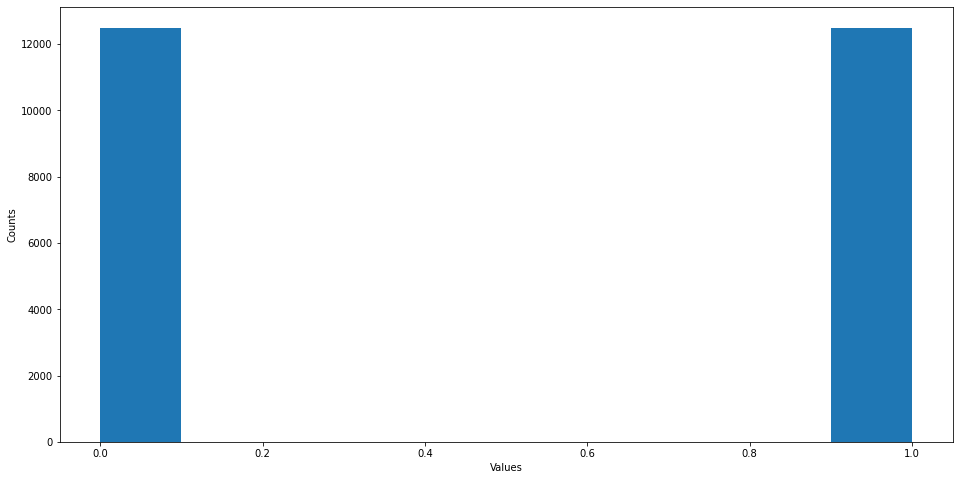

In [103]:
plt.figure(figsize=(16, 8))

# Plot histogram
plt.hist(labels)
plt.xlabel('Values')
plt.ylabel('Counts')
plt.show()

###реализация

In [ ]:
batch_size = 50
sorted_train = sorted(train, key = lambda x: len(x['text']))
sorted_test = sorted(test, key = lambda x: len(x['text']))

In [ ]:
%%time
mean_embeddings = None

for i in range(len(train) // batch_size):
  batch = sorted_train[batch_size * i: batch_size*(i+1)]
  encoded = tokenizer.batch_encode_plus([x['text'] for x in batch], max_length=max([len(x) for x in batch]) + 3, padding='max_length', truncation=True)
  encoded_inputs = {key:torch.LongTensor(value).to(device) for key, value in encoded.items()}
  with torch.no_grad():
        outputs = model(**encoded_inputs)
  lhs = outputs['last_hidden_state']
  attention = encoded_inputs['attention_mask'].reshape((lhs.size()[0], lhs.size()[1], -1)).expand(-1, -1, 768)
  embeddings = torch.mul(lhs, attention)
  denominator = torch.count_nonzero(embeddings, dim=1)
  if mean_embeddings == None:
    mean_embeddings = torch.div(torch.sum(embeddings, dim=1), denominator)
  else:
    mean_embeddings = torch.cat((mean_embeddings, torch.div(torch.sum(embeddings, dim=1), denominator)), dim = 0)

In [ ]:
%%time
mean_embeddings_test = None

for i in range(len(test) // batch_size):
  batch = sorted_test[batch_size * i: batch_size*(i+1)]
  encoded = tokenizer.batch_encode_plus([x['text'] for x in batch], max_length=max([len(x) for x in batch]) + 3, padding='max_length', truncation=True)
  encoded_inputs = {key:torch.LongTensor(value).to(device) for key, value in encoded.items()}
  with torch.no_grad():
        outputs = model(**encoded_inputs)
  lhs = outputs['last_hidden_state']
  attention = encoded_inputs['attention_mask'].reshape((lhs.size()[0], lhs.size()[1], -1)).expand(-1, -1, 768)
  embeddings = torch.mul(lhs, attention)
  denominator = torch.count_nonzero(embeddings, dim=1)
  if mean_embeddings_test == None:
    mean_embeddings_test = torch.div(torch.sum(embeddings, dim=1), denominator)
  else:
    mean_embeddings_test = torch.cat((mean_embeddings_test, torch.div(torch.sum(embeddings, dim=1), denominator)), dim = 0)

In [ ]:
mean_embeddings.shape

In [ ]:
mean_embeddings_test.shape

##part 1

* Make a 2D reduction and draw plot for train labels.
* Analyze your results. 

How to:

1) convert embeddings to numpy matrix

2) apply PCA(n_components=2) from sklearn, use plt.scatter

3) ???

4) profit

In [92]:
# прикольно, что эта ячейка ничего не делает (картинка с ней и без нее не меняется, дисперсия по осям тоже)
# то есть, эмбеддинги, полученные из берта были центрированы
from sklearn.preprocessing import StandardScaler, MinMaxScaler

ssc = StandardScaler(with_std=False)
X = ssc.fit_transform(mean_embeddings.cpu().numpy())
X_test = ssc.fit_transform(mean_embeddings_test.cpu().numpy())

In [93]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca = PCA(n_components=2, random_state=1337)
emb_2d = pca.fit_transform(X)
emb_2d_test = pca.transform(X_test)

In [94]:
sorted_labels = np.array([x['label'] for x in sorted_train[:emb_2d.shape[0]]]) 
sorted_labels_test = np.array([x['label'] for x in sorted_train[:emb_2d_test.shape[0]]]) 

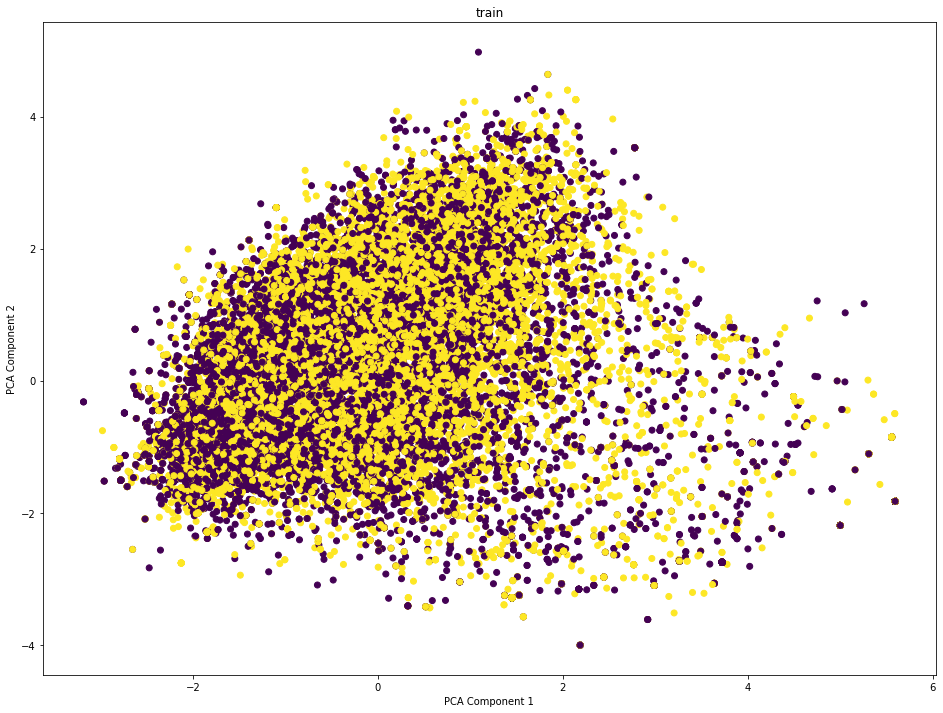

In [95]:
plt.figure(figsize=(16, 12))
plt.scatter(emb_2d[:, 0], emb_2d[:, 1], c=sorted_labels)
plt.title('train')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [96]:
print(f'дисперися по оси x: {np.var(emb_2d[:, 0])}')
print(f'дисперися по оси y: {np.var(emb_2d[:, 1])}')

дисперися по оси x: 2.902806282043457
дисперися по оси y: 2.324824810028076


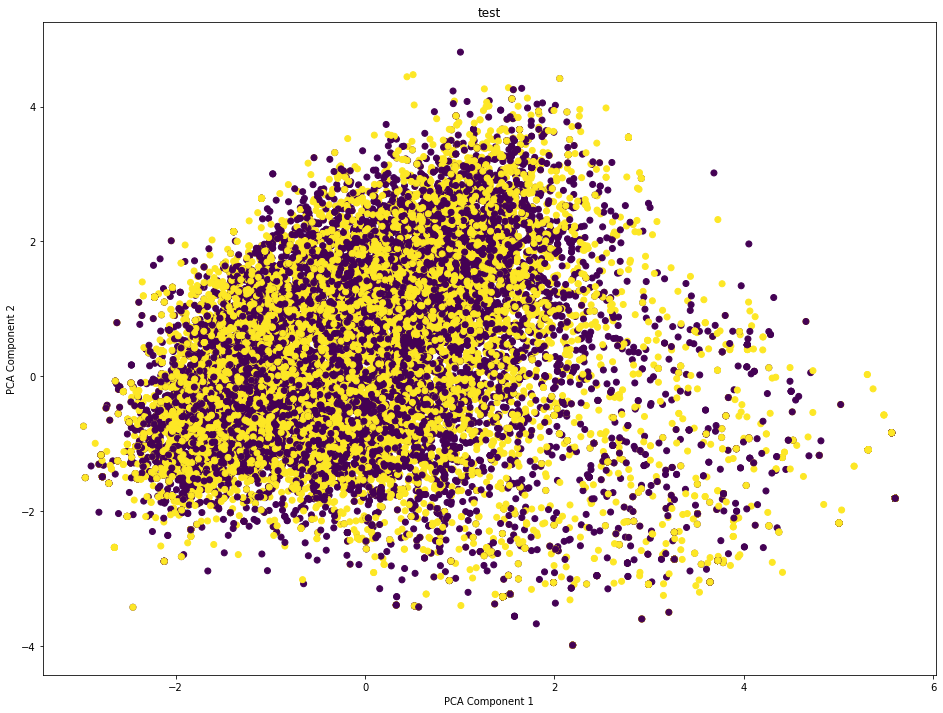

In [97]:
plt.figure(figsize=(16, 12))
plt.scatter(emb_2d_test[:, 0], emb_2d_test[:, 1], c=sorted_labels_test)
plt.title('test')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [98]:
print(f'дисперися по оси x: {np.var(emb_2d_test[:, 0])}')
print(f'дисперися по оси y: {np.var(emb_2d_test[:, 1])}')

дисперися по оси x: 2.8844823837280273
дисперися по оси y: 2.3127028942108154


положительный и отрицательный класс имеют одинаковое распределение

выборка, очевидно, линейно неразделима, возможно, ядровой svm сможет решить проблему, никакая регрессия точно не справится

##part 2

Make first classifier

Use pretrained embeddings as features to classifier. You can use for example SVM or LinearRegression.

Evaluate yourself by test dataset labels, do not use for train!

How to:

1) use any classifier from sklearn library, train in on np.array of embeddings vectors from step 0.

2) compute accuracy

In [ ]:
!wget https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb
2
!dpkg -i cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb
!ls /var/cuda-repo-9-0-local | grep .pub
!apt-key add /var/cuda-repo-9-0-local/7fa2af80.pub
!apt-get update
!sudo apt-get install cuda-9.0
!nvcc --version
!pip install thundersvm

In [100]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

x_train = normalizer.fit_transform(mean_embeddings.cpu().numpy())
x_test = normalizer.transform(mean_embeddings_test.cpu().numpy())

y_train = np.array([x['label'] for x in sorted_train[:x_train.shape[0]]]) 
y_test = np.array([x['label'] for x in sorted_train[:x_test.shape[0]]]) 

In [101]:
from thundersvm import SVC
from sklearn.metrics import accuracy_score
svc = SVC(kernel = 'rbf', random_state=1337).fit(x_train, y_train)

In [102]:
svc_train_predictions = svc.predict(x_train)
svc_test_predictions = svc.predict(x_test)

In [103]:
print(f'train accuracy: {accuracy_score(y_train, svc_train_predictions)}')
print(f'test accuracy: {accuracy_score(y_test, svc_test_predictions)}')

train accuracy: 0.53004
test accuracy: 0.4994


модель угадывает классы не лучше, чем случайно подброшенная монетка :/

##part 3

Finetune on Classification task

Finetune on a classification task with BERT-based model you chose in the 0 part

Evaluate yourself by test dataset labels, do not use for train!

How to:

1) Switch to BertModelForSequenceClassification, pass num_classes

2) Add labels (if you removed them) to your datasets.Dataset class

3) Train model using huggingface Trainer class. Make sure that out = model(**batch) results in out.loss is not None.

 You can google a lot of examples how to do it finetune huggingface bert for sequence classification

https://huggingface.co/docs/transformers/training

In [104]:
type(ds)

datasets.dataset_dict.DatasetDict

In [105]:
from transformers import AutoTokenizer

def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

tokenized_datasets = ds.map(tokenize_function, batched=True)

  0%|          | 0/25 [00:00<?, ?ba/s]

  0%|          | 0/25 [00:00<?, ?ba/s]

  0%|          | 0/50 [00:00<?, ?ba/s]

In [106]:
small_train_dataset = tokenized_datasets["train"].shuffle(seed=1337).select(range(5000))
small_eval_dataset = tokenized_datasets["test"].shuffle(seed=1337).select(range(5000))

In [121]:
from transformers import AutoModelForSequenceClassification
bert_base_cased_clf = AutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=2).to(device)

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-cased/snapshots/5532cc56f74641d4bb33641f5c76a55d11f846e0/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-cased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.26.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}

loading weights file pytorch_model.bin from cache at /root/.cache/huggingface/hub/models--bert-base-cased/snapshots/5532cc56f74641d4bb33641f5c76a55d11f846e0/pytorch_model.b

In [ ]:
!pip install evaluate

In [123]:
import evaluate

metric = evaluate.load("accuracy")

In [124]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [125]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(output_dir="test_trainer", evaluation_strategy="epoch")

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [126]:
trainer = Trainer(
    model=bert_base_cased_clf,
    args=training_args,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=compute_metrics,
)

In [127]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running training *****
  Num examples = 5000
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 1875
  Number of trainable parameters = 108311810


Epoch,Training Loss,Validation Loss,Accuracy
1,0.496800,0.342959,0.874200
2,0.323300,0.392047,0.891200
3,0.212200,0.413241,0.906200


Saving model checkpoint to test_trainer/checkpoint-500
Configuration saved in test_trainer/checkpoint-500/config.json
Model weights saved in test_trainer/checkpoint-500/pytorch_model.bin
The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8
Saving model checkpoint to test_trainer/checkpoint-1000
Configuration saved in test_trainer/checkpoint-1000/config.json
Model weights saved in test_trainer/checkpoint-1000/pytorch_model.bin
The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num 

TrainOutput(global_step=1875, training_loss=0.3036133158365885, metrics={'train_runtime': 1886.3294, 'train_samples_per_second': 7.952, 'train_steps_per_second': 0.994, 'total_flos': 3946665830400000.0, 'train_loss': 0.3036133158365885, 'epoch': 3.0})

нам удалось выбить accuracy 0.9 с трех эпох - впечатляюще


##part 4

Finetune LM

Finetune language model with BERT-based model you chose in the 0 part.

How to:

1) Switch to BertModelForMaskedLM

2) Switch DataCollator to DataCollatorForLM(mlm=True) 

3) Finetune it using huggingface trainer on your dataset. 

You can google a lot of examples like finetune MLM bert huggingface

https://huggingface.co/course/chapter7/3?fw=tf

In [13]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached transformers-4.26.1-py3-none-any.whl (6.3 MB)
  Using cached tokenizers-0.13.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (7.6 MB)


In [16]:
from transformers import AutoModelForMaskedLM, AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')
bert_finetuned_cased = AutoModelForMaskedLM.from_pretrained("bert-base-cased").to(device)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [17]:
def tokenize_function(examples):
    result = tokenizer(examples["text"])
    if tokenizer.is_fast:
        result["word_ids"] = [result.word_ids(i) for i in range(len(result["input_ids"]))]
    return result


# Use batched=True to activate fast multithreading!
tokenized_datasets = ds.map(
    tokenize_function, batched=True, remove_columns=["text", "label"]
)
tokenized_datasets

  0%|          | 0/25 [00:00<?, ?ba/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (521 > 512). Running this sequence through the model will result in indexing errors


  0%|          | 0/25 [00:00<?, ?ba/s]

  0%|          | 0/50 [00:00<?, ?ba/s]

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'word_ids'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'word_ids'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'word_ids'],
        num_rows: 50000
    })
})

In [64]:
chunk_size = 128

In [19]:
def group_texts(examples):
    # Concatenate all texts
    concatenated_examples = {k: sum(examples[k], []) for k in examples.keys()}
    # Compute length of concatenated texts
    total_length = len(concatenated_examples[list(examples.keys())[0]])
    # We drop the last chunk if it's smaller than chunk_size
    total_length = (total_length // chunk_size) * chunk_size
    # Split by chunks of max_len
    result = {
        k: [t[i : i + chunk_size] for i in range(0, total_length, chunk_size)]
        for k, t in concatenated_examples.items()
    }
    # Create a new labels column
    result["labels"] = result["input_ids"].copy()
    return result

In [20]:
lm_datasets = tokenized_datasets.map(group_texts, batched=True)
lm_datasets

  0%|          | 0/25 [00:00<?, ?ba/s]

  0%|          | 0/25 [00:00<?, ?ba/s]

  0%|          | 0/50 [00:00<?, ?ba/s]

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'word_ids', 'labels'],
        num_rows: 63037
    })
    test: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'word_ids', 'labels'],
        num_rows: 61623
    })
    unsupervised: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'word_ids', 'labels'],
        num_rows: 126497
    })
})

In [21]:
tokenizer.decode(lm_datasets["train"][3]["input_ids"])

'have much of a plot. [SEP] [CLS] " I Am Curious : Yellow " is a risible and pretentious steaming pile. It doesn\'t matter what one\'s political views are because this film can hardly be taken seriously on any level. As for the claim that frontal male nudity is an automatic NC - 17, that isn\'t true. I\'ve seen R - rated films with male nudity. Granted, they only offer some fleeting views, but where are the R - rated films with gaping vulvas and flapping labia? Nowhere, because they don \''

In [22]:
from transformers import DataCollatorForLanguageModeling

data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm_probability=0.15)

In [24]:
samples = [lm_datasets["train"][i] for i in range(2)]
for sample in samples:
    _ = sample.pop("word_ids")

for chunk in data_collator(samples)["input_ids"]:
    print(f"\n'>>> {tokenizer.decode(chunk)}'")


'>>> [CLS] I rented I AM [MASK]URIO [MASK] - [MASK] [MASK]LOW [MASK] my video store because of all the controversy that surrounded it when [MASK] was first released [MASK] 1967. [MASK] also heard that at first it was seized by U. S. customs if it ever tried to enter this country, therefore [MASK] a fan 180 films considered " flared " I really had to [MASK] this for myself. < br [MASK] > < br / > [MASK] plot is centered around a young [MASK] drama student named Lena who wants to learn everything she can [MASK] [MASK]. In particular she wants to focus [MASK] attentions to [MASK] some sort of documentary on [MASK] the [MASK] [MASK]wed'

'>>> ##e thought about certain political issues such as the [MASK] War and race [MASK] [MASK] the [MASK] States. [MASK] between asking politicians and ordinary denize forewings of Stockholm about their opinions on [MASK], she has sex [MASK] her drama teacher, classmates, and married men. < br / > < br / > [MASK] kills me about I [MASK] CUR [MASK]US - YEL 

In [61]:
train_size = 10_000
test_size = int(0.1 * train_size)

downsampled_dataset = lm_datasets["train"].train_test_split(
    train_size=train_size, test_size=test_size, seed=42
)
downsampled_dataset

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'word_ids', 'labels'],
        num_rows: 10000
    })
    test: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'word_ids', 'labels'],
        num_rows: 1000
    })
})

In [65]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(output_dir="mlm_bert_finetuning", evaluation_strategy="epoch")

trainer = Trainer(model=bert_finetuned_cased,
                  args=training_args,
                  data_collator=data_collator,
                  train_dataset=downsampled_dataset['train'],
                  eval_dataset=downsampled_dataset['test'],
                  )

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [66]:
# Run training.
trainer.train()
# Save model.
trainer.save_model()

The following columns in the training set don't have a corresponding argument in `BertForMaskedLM.forward` and have been ignored: word_ids. If word_ids are not expected by `BertForMaskedLM.forward`,  you can safely ignore this message.
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 10000
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 3750
  Number of trainable parameters = 108340804


Epoch,Training Loss,Validation Loss
1,0.326400,2.668057
2,2.220100,2.189734
3,2.138900,2.137957


Saving model checkpoint to mlm_bert_finetuning/checkpoint-500
Configuration saved in mlm_bert_finetuning/checkpoint-500/config.json
Configuration saved in mlm_bert_finetuning/checkpoint-500/generation_config.json
Model weights saved in mlm_bert_finetuning/checkpoint-500/pytorch_model.bin
Saving model checkpoint to mlm_bert_finetuning/checkpoint-1000
Configuration saved in mlm_bert_finetuning/checkpoint-1000/config.json
Configuration saved in mlm_bert_finetuning/checkpoint-1000/generation_config.json
Model weights saved in mlm_bert_finetuning/checkpoint-1000/pytorch_model.bin
The following columns in the evaluation set don't have a corresponding argument in `BertForMaskedLM.forward` and have been ignored: word_ids. If word_ids are not expected by `BertForMaskedLM.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1000
  Batch size = 8
Saving model checkpoint to mlm_bert_finetuning/checkpoint-1500
Configuration saved in mlm_bert_finetuning/chec

##part 5

Finetune on classification task your new LM model

Finetune on a classification task with BERT-based model you've done in part 4
Evaluate yourself by test dataset labels, do not use for train!

How to:

1) Initilize BertModelForSequenceClassification from model trained in part 4

2) repeat step 3

In [ ]:
from transformers import AutoModelForSequenceClassification, BertConfig

bert_finetuned_cased_clf = AutoModelForSequenceClassification.from_pretrained('bert-base-cased', num_labels=2)

bert_finetuned_cased_clf.bert.load_state_dict(bert_finetuned_cased.bert.state_dict(), strict=False) #<- эту строчку написала chatGPT

bert_finetuned_cased_clf.to(device)

In [77]:
from transformers import AutoTokenizer

def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

tokenized_datasets = ds.map(tokenize_function, batched=True)

small_train_dataset = tokenized_datasets["train"].shuffle(seed=1337).select(range(5000))
small_eval_dataset = tokenized_datasets["test"].shuffle(seed=1337).select(range(5000))

  0%|          | 0/25 [00:00<?, ?ba/s]

  0%|          | 0/25 [00:00<?, ?ba/s]

  0%|          | 0/50 [00:00<?, ?ba/s]

In [ ]:
!pip install evaluate

In [79]:
import evaluate

metric = evaluate.load("accuracy")

In [80]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [81]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(output_dir="bert_finetuned_cased_clf", evaluation_strategy="epoch")

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [82]:
trainer = Trainer(
    model=bert_finetuned_cased_clf,
    args=training_args,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=compute_metrics,
)

In [84]:
import numpy as np
trainer.train()

The following columns in the training set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running training *****
  Num examples = 5000
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 1875
  Number of trainable parameters = 108311810


Epoch,Training Loss,Validation Loss,Accuracy
1,0.295400,0.345870,0.902600
2,0.172200,0.442955,0.907200
3,0.088300,0.442955,0.907200


Saving model checkpoint to test_trainer/checkpoint-500
Configuration saved in test_trainer/checkpoint-500/config.json
Model weights saved in test_trainer/checkpoint-500/pytorch_model.bin
The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


Epoch,Training Loss,Validation Loss


Saving model checkpoint to test_trainer/checkpoint-1000
Configuration saved in test_trainer/checkpoint-1000/config.json
Model weights saved in test_trainer/checkpoint-1000/pytorch_model.bin
The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8
Saving model checkpoint to test_trainer/checkpoint-1500
Configuration saved in test_trainer/checkpoint-1500/config.json
Model weights saved in test_trainer/checkpoint-1500/pytorch_model.bin
The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  N

TrainOutput(global_step=1875, training_loss=0.159156201171875, metrics={'train_runtime': 1863.932, 'train_samples_per_second': 8.048, 'train_steps_per_second': 1.006, 'total_flos': 4209776885760000.0, 'train_loss': 0.159156201171875, 'epoch': 3.0})

##part 6


Results
Describe your results and experiments. Compare results from tree classifiers.

Итак, классификатор BertModelForSequenceClassification, использующий базовую BertForMaskedLM без файнтюнинга за три эпохи обучается на качество 0.906200


BertModelForSequenceClassification, использующий BertForMaskedLM, дообученный на наших данных, начинает стакого качества, но не показывает значительного роста при обучении 

Все это в любом случае на 40% выше качества svm даже с гауссовым ядром

transformer advantage shown

